In [1]:

import torch
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df0 = pd.read_csv("/content/drive/My Drive/LIN371/example_sent/result0.csv")
df1 = pd.read_csv("/content/drive/My Drive/LIN371/example_sent/result1.csv")
df2 = pd.read_csv("/content/drive/My Drive/LIN371/example_sent/result2.csv")
df3 = pd.read_csv("/content/drive/My Drive/LIN371/example_sent/result3.csv")

In [2]:
new_df0 = pd.read_csv("/content/drive/My Drive/LIN371/example_sent/newest_result0.csv")
new_df1 = pd.read_csv("/content/drive/My Drive/LIN371/example_sent/newest_result1.csv")

In [ ]:
df0 = df0[['token', 'simple_l2', 'mlm_simple_l2', 'int_grad', 'mlm_int_grad', 'perturb_proba0', 'perturb_proba0_change', 'mlm_perturb_proba0', 'mlm_perturb_proba0_change']]
df1 = df1[['token', 'simple_l2', 'mlm_simple_l2', 'int_grad', 'mlm_int_grad', 'perturb_proba0', 'perturb_proba0_change', 'mlm_perturb_proba0', 'mlm_perturb_proba0_change']]
df2 = df2[['token', 'simple_l2', 'mlm_simple_l2', 'int_grad', 'mlm_int_grad', 'perturb_proba0', 'perturb_proba0_change', 'mlm_perturb_proba0', 'mlm_perturb_proba0_change']]
df3 = df3[['token', 'simple_l2', 'mlm_simple_l2', 'int_grad', 'mlm_int_grad', 'perturb_proba0', 'perturb_proba0_change', 'mlm_perturb_proba0', 'mlm_perturb_proba0_change']]

In [3]:
new_df0 = new_df0[['token', 'simple_l2', 'mlm_simple_l2', 'int_grad', 'mlm_int_grad', 'perturb_proba0', 'perturb_proba0_change', 'mlm_perturb_proba0', 'mlm_perturb_proba0_change']]
new_df1 = new_df1[['token', 'simple_l2', 'mlm_simple_l2', 'int_grad', 'mlm_int_grad', 'perturb_proba0', 'perturb_proba0_change', 'mlm_perturb_proba0', 'mlm_perturb_proba0_change']]


In [ ]:
df0.to_csv("/content/drive/My Drive/LIN371/example_sent/result0.csv", index=False)
df1.to_csv("/content/drive/My Drive/LIN371/example_sent/result1.csv", index=False)
df2.to_csv("/content/drive/My Drive/LIN371/example_sent/result2.csv", index=False)
df3.to_csv("/content/drive/My Drive/LIN371/example_sent/result3.csv", index=False)

In [5]:
new_df0.to_csv("/content/drive/My Drive/LIN371/example_sent/newest_result0.csv", index=False)
new_df1.to_csv("/content/drive/My Drive/LIN371/example_sent/newest_result1.csv", index=False)

In [ ]:
df3

,token,simple_l2,mlm_simple_l2,int_grad,mlm_int_grad,perturb_proba0,perturb_proba0_change,mlm_perturb_proba0,mlm_perturb_proba0_change
0,[CLS],0.108779,0.260486,0.030687,0.012645,NaN,NaN,NaN,NaN
1,man,0.283163,0.581357,-0.074261,-0.079672,0.000687,-0.000119,0.002232,-0.000073
2,i,0.157900,0.271053,0.063783,0.034830,0.000764,-0.000042,0.002264,-0.000041
3,love,0.224341,0.424006,0.368018,0.355517,0.000745,-0.000061,0.002550,0.000246
4,a,0.226504,0.276085,0.193575,0.179483,0.000726,-0.000080,0.002399,0.000095
5,bush,0.671435,0.923071,0.220481,0.060750,0.000811,0.000004,0.002272,-0.000032
6,!,0.275994,0.560980,0.131700,0.236318,0.000795,-0.000011,0.003024,0.000720
7,u,0.500622,1.403063,0.240636,0.393314,0.001397,0.000591,0.004140,0.001836
8,are,0.237376,0.582913,0.043333,-0.041559,0.001080,0.000274,0.002857,0.000552
9,stunning,0.695976,1.127330,0.232879,0.571397,0.006175,0.005369,0.024346,0.022042


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df):
  test = df[-df['token'].isin(['unmasked'])]
  test = test.set_index('token')

  # Normalize each column to the range [0, 1]
  # df_normalized = test[['simple_l2', 'mlm_simple_l2']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
  # df_normalized2 = test[['int_grad', 'mlm_int_grad', 'perturb_proba0', 'perturb_proba0_change', 'mlm_perturb_proba0', 'mlm_perturb_proba0_change']].apply(lambda x: (x / max(abs(x.max()), abs(x.min()))))
  # df_normalized = pd.concat([df_normalized, df_normalized2], axis=1)
  df_normalized = test.apply(lambda x: (x / max(abs(x.max()), abs(x.min()))))


  # Plot using seaborn heatmap
  plt.figure(figsize=(8, 4))
  sns.heatmap(df_normalized, annot=test, cmap="binary", cbar=True)
  plt.show()


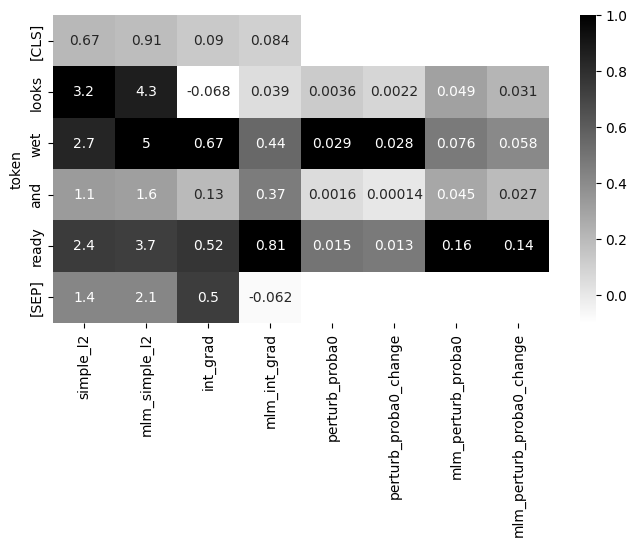

In [ ]:
plot_heatmap(df0)

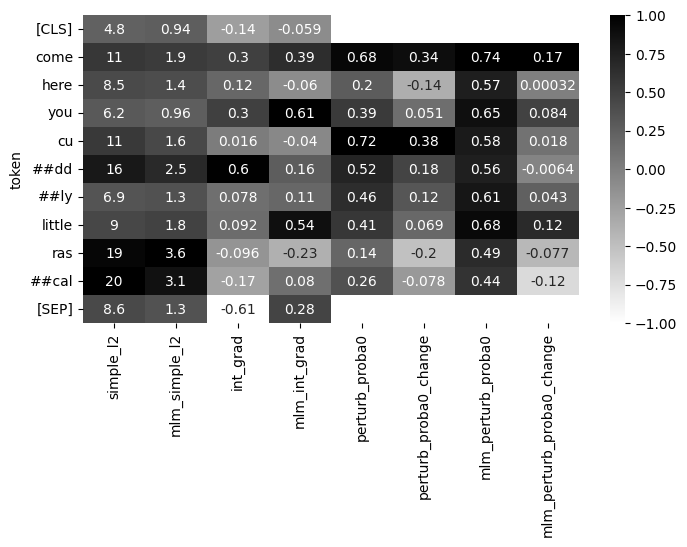

In [ ]:
plot_heatmap(df1)

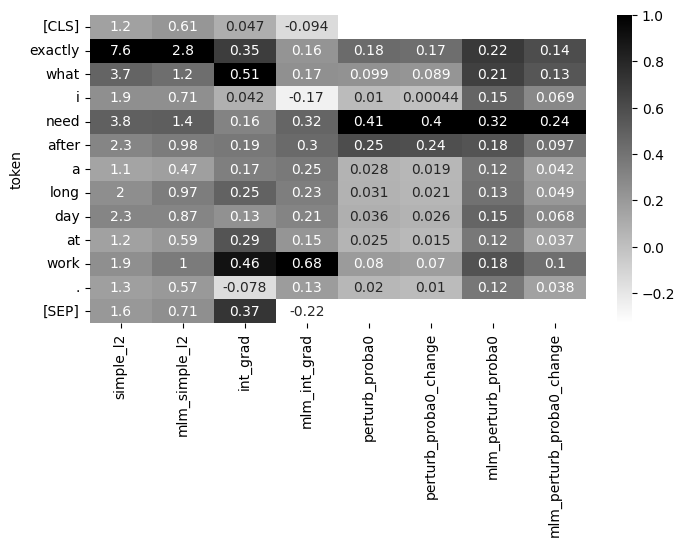

In [ ]:
plot_heatmap(df2)

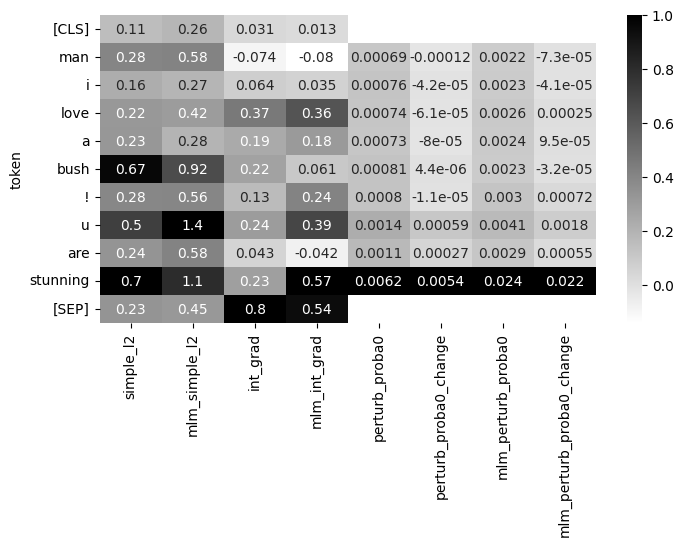

In [ ]:
plot_heatmap(df3)

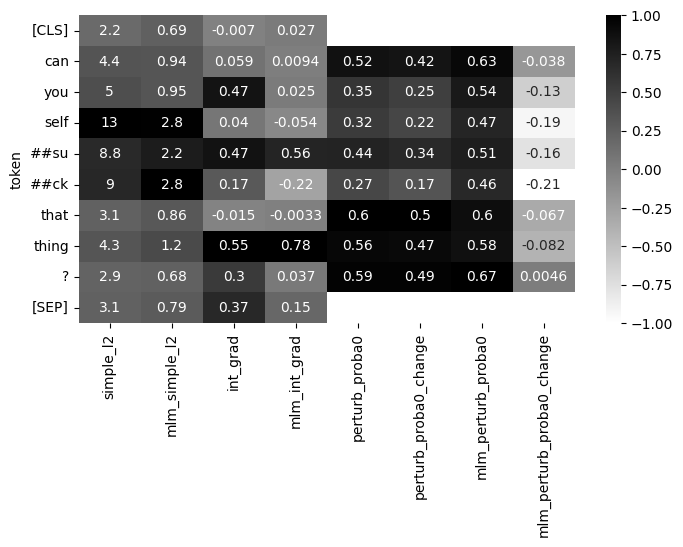

In [7]:
plot_heatmap(new_df0)

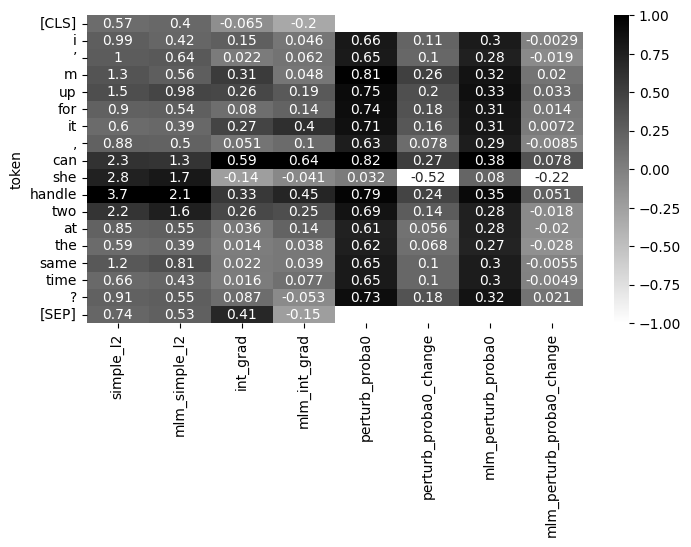

In [8]:
plot_heatmap(new_df1)